In [6]:
!pip install sympy==1.6.2
!pip install plotly==4.10

     |████████████████████████████████| 13.0MB 302kB/s 
  Found existing installation: plotly 4.9.0
    Uninstalling plotly-4.9.0:
      Successfully uninstalled plotly-4.9.0


In [3]:
import numpy as np
import sympy as sp
import av_utils2 as av
import sympy.vector as sv
import plotly.graph_objects as go

sp.init_printing()
R = sv.CoordSys3D('R')

from sympy.abc import t,x,y,z,theta,phi

In [4]:
def field(x,y):
  return -y*R.i + x*R.j

field(x,y)

###Comentário

In [5]:
R.x

In [8]:
def field1(x,y):
  return -y*R.i + x*R.j

field1(R.x,R.y)  

In [9]:
field1 = -R.y*R.i + R.x*R.j
field1 

In [10]:
field(2,3)

In [11]:
field(-1,-200)

In [17]:
vectors = []
for xx in range(-2,3):
  for yy in range(-2,3):
    vectors.append(field(x,y).subs({x:xx, y:yy}))

vectors    

In [18]:
import plotly.figure_factory as ff
#Para usar plotly temos que sempre passar de sympy pra numpy

In [34]:
c = list(field(x,y).components.values())

field_np = sp.lambdify([x,y], c, 'numpy')
print(field_np(x,y))

xx, yy = np.mgrid[-5:5:20j, -5:5:20j]

uu, vv = field_np(xx,yy)

fig = ff.create_quiver(xx,yy,uu,vv)
fig.update_layout(yaxis=dict(scaleanchor="x", scaleratio=1))

[-y, x]


In [35]:
av.vector(x = xx.flatten(), y = yy.flatten(), u = uu.flatten(), v = vv.flatten())

In [39]:
c = list(field(x,y).components.values())

field_np = sp.lambdify([x,y], c, 'numpy')
xx = np.linspace(-5,5,20)
yy = np.linspace(-5,5,20)
X ,Y = np.meshgrid(xx,yy)

uu ,vv = field_np(X,Y)

fig = ff.create_streamline(xx,yy,uu,vv)
fig.update_layout(yaxis=dict(scaleanchor="x", scaleratio=1))

##Campo vetorial 3D

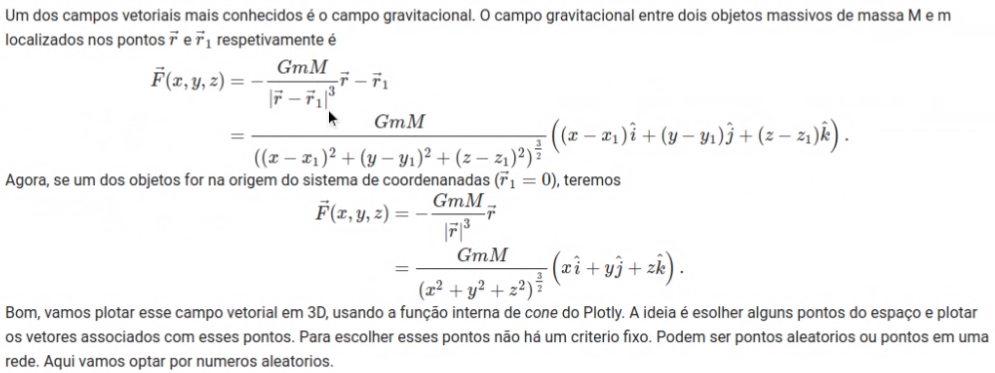

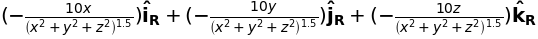

In [41]:
def gravitation(x,y,z, G=1, m=1, M=10):
    return -((G*m*M)/(x**2 + y**2 + z**2)**(3/2))*(x*R.i + y*R.j + z*R.k)

gravitation(x,y,z)    

In [42]:
gravitation(2,3,4)

In [43]:
xx, yy, zz = np.mgrid[-2:2:5j, -2:2:5j, -2:2:5j]
c = list(gravitation(x,y,z).components.values())
gravitation_np = sp.lambdify([x, y, z], c, 'numpy')

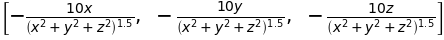

In [44]:
gravitation_np(x, y, z)

In [45]:
uu, vv, ww = gravitation_np(xx, yy, zz)

<string>:2: RuntimeWarning:

divide by zero encountered in power

<string>:2: RuntimeWarning:

invalid value encountered in multiply



In [46]:
def flatten_vf(x, y, z, u, v, w):
  return x.flatten(), y.flatten(), z.flatten(), u.flatten(), v.flatten(), w.flatten()

In [47]:
xx, yy, zz, uu, vv, ww = flatten_vf(xx, yy, zz, uu, vv, ww)

In [48]:
fig = go.Figure()
fig.add_cone(x = xx, y = yy, z = zz, u = uu, v = vv, w = ww)

In [ ]:
av.plot3d_vector_field(gravitation(x, y, z), (x,-15,15), (y,-15,15), (z,-15,15), points = )